In [5]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [13]:
gn = 5
k = 2
ns = 50
p = 0.2

graph = nx.grid_graph([k * gn, k * gn])
        
# this part adds queen adjacency
for i in range(k*gn-1):
   for j in range(k*gn):
       if j<(k*gn-1):
           graph.add_edge((i,j),(i+1,j+1))
           graph[(i,j)][(i+1,j+1)]["shared_perim"]=0
       if j >0:
           graph.add_edge((i,j),(i+1,j-1))
           graph[(i,j)][(i+1,j-1)]["shared_perim"]=0

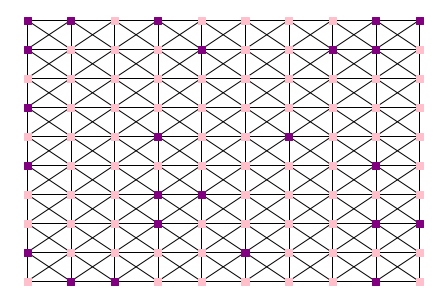

In [7]:
#random method
for n in graph.nodes():
    graph.node[n]["population"] = 1

    if random.random() < p:
        graph.node[n]["pink"] = 0
        graph.node[n]["purple"] = 1
    else:
        graph.node[n]["pink"] = 1
        graph.node[n]["purple"] = 0
#     if 0 in n or k * gn - 1 in n:
#         graph.node[n]["boundary_node"] = True
#         graph.node[n]["boundary_perim"] = 1

#     else:
#         graph.node[n]["boundary_node"] = False

cdict = {1: "pink", 0: "purple"}

plt.figure()
nx.draw(
    graph,
    pos={x: x for x in graph.nodes()},
    node_color=[cdict[graph.node[x]["pink"]] for x in graph.nodes()],
    node_size=ns,
    node_shape="s",
)
plt.show()

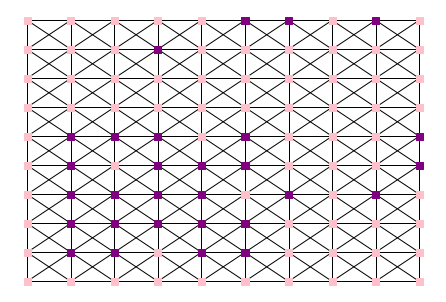

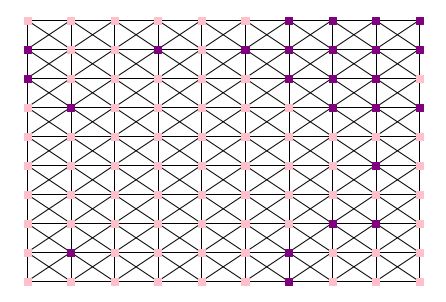

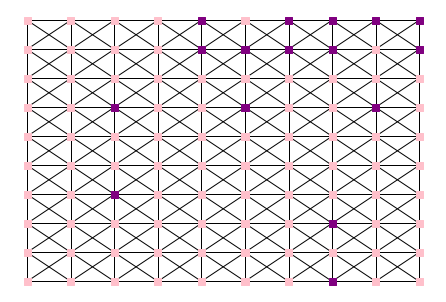

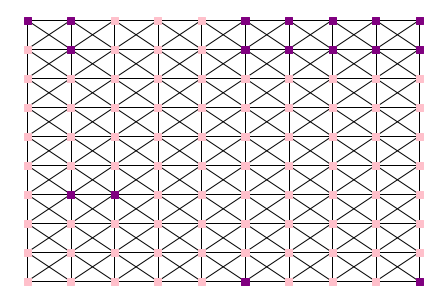

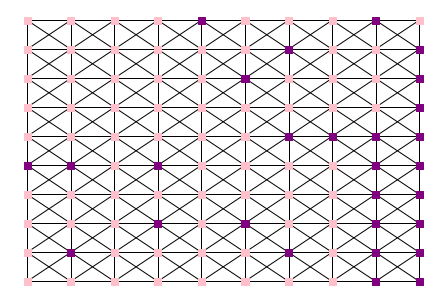

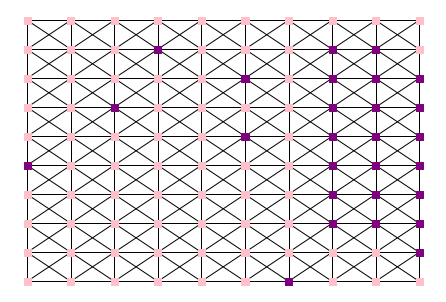

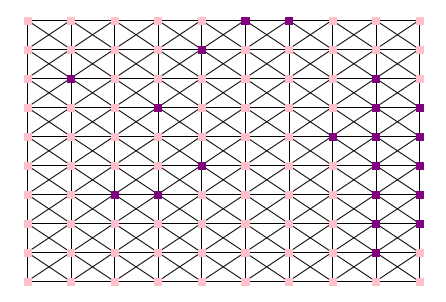

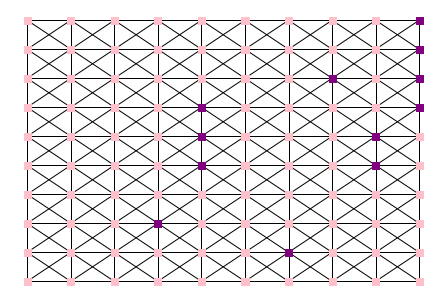

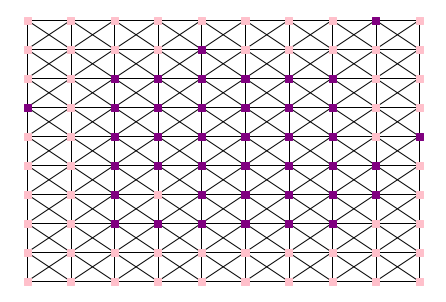

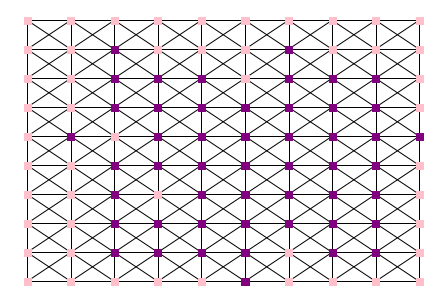

In [8]:
#square method
#To be updated! Will adjust square so that it does not run off of grid.

from random import choice
for k in range(10):
    random_node = choice(list(graph.nodes()))
    
    w = choice(range(5,10))

    square_nodes = []
    for i in range(random_node[0],random_node[0]+w):
        for j in range(random_node[1],random_node[1]+w):
            square_nodes.append((i,j))

    for n in graph.nodes():
        if n in square_nodes:
            #print(n)
            #graph.node[n]["square"]
            if random.random() < .9:
                graph.node[n]["purple"] = 1
                graph.node[n]["pink"] = 0
            else:
                graph.node[n]["purple"] = 0
                graph.node[n]["pink"] = 1
        else:
            if random.random() < .1:
                graph.node[n]["purple"] = 1
                graph.node[n]["pink"] = 0
            else:
                graph.node[n]["purple"] = 0
                graph.node[n]["pink"] = 1

    cdict = {1: "pink", 0: "purple"}
    
    plt.figure()
    nx.draw(
        graph,
        pos={x: x for x in graph.nodes()},
        node_color=[cdict[graph.node[x]["pink"]] for x in graph.nodes()],
        node_size=ns,
        node_shape="s",
    )
    plt.show()

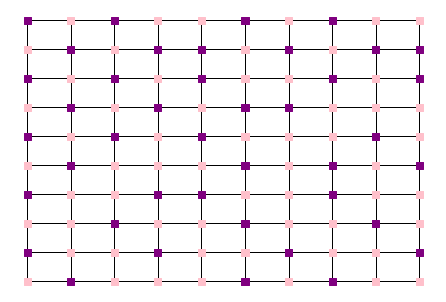

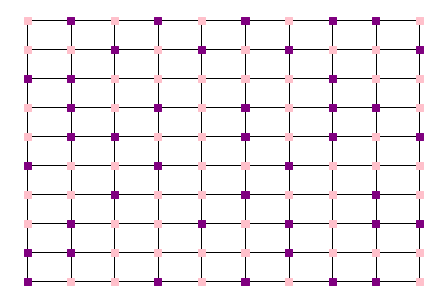

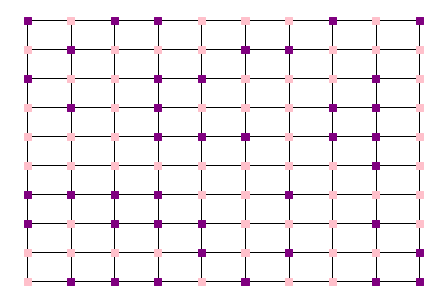

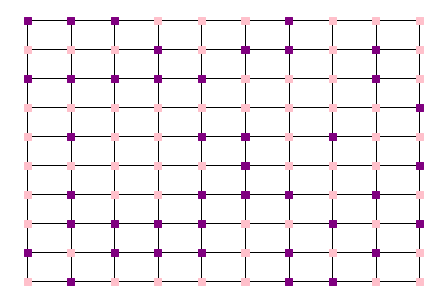

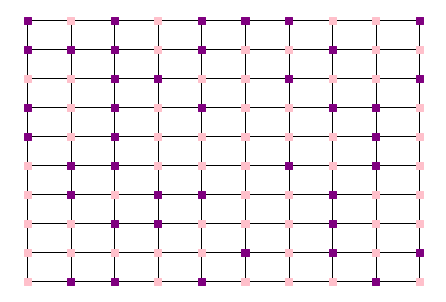

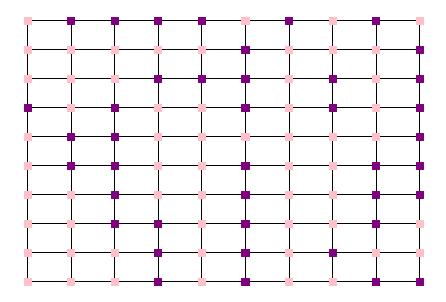

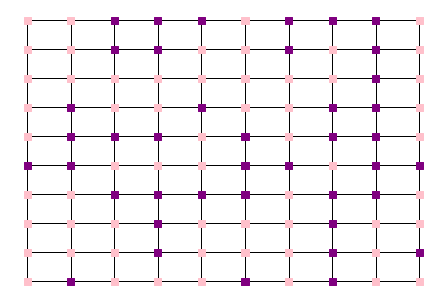

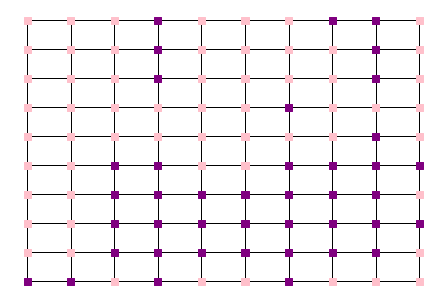

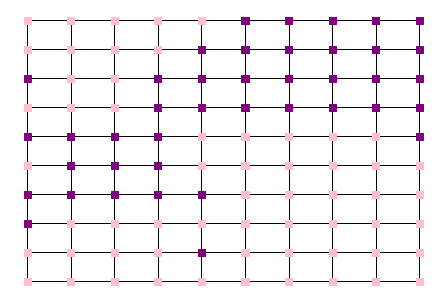

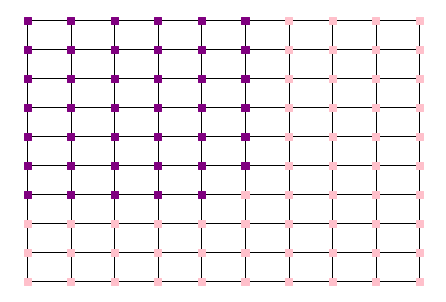

In [63]:
#rich get richer model

cluster_param = 2
dual_graph_list = []

#For multiplicative weights
for cluster_param in [-4,-2,-1,-0.5,0,0.5,1,2,4,8]:
#For exponential weights
#for cluster_param in [0.25,0.5,0.75,1,1.5,2,4,8,16,32]:
    gn = 5
    k = 2
    ns = 50
    p = 0.4

    graph = nx.grid_graph([k * gn, k * gn])
    
    # this part adds queen adjacency
    # Commented out for now to line up with other 10x10 grids we've done
    '''
    for i in range(k*gn-1):
       for j in range(k*gn):
           if j<(k*gn-1):
               graph.add_edge((i,j),(i+1,j+1))
               graph[(i,j)][(i+1,j+1)]["shared_perim"]=0
           if j >0:
               graph.add_edge((i,j),(i+1,j-1))
               graph[(i,j)][(i+1,j-1)]["shared_perim"]=0
    '''
    
    #color all nodes pink
    for n in graph.nodes():
        graph.node[n]["population"] = 1
        graph.node[n]["pink"] = 1
        graph.node[n]["purple"] = 0

    #pick a random node to be purple
    random.seed()
    random_node = choice(list(graph.nodes()))
    graph.node[random_node]["pink"]=0
    graph.node[random_node]["purple"]=1

    #Pick p percent of nodes to be purple
    for i in range(int(p*len(graph.nodes()))):
        population = []
        weights = []

        for n in graph.nodes():
            count = 0
            for nbr in graph.neighbors(n):
                if graph.nodes[nbr]["purple"] == 1:
                    count += 1
            if graph.nodes[n]["pink"] == 1:
                population.append(n)
                #Multiplicative weights
                weights.append((count+1)**cluster_param)
                #Exponential Weights
                #weights.append(cluster_param**count)
        sample = random.choices(population, weights)
        graph.node[sample[0]]["pink"]=0
        graph.node[sample[0]]["purple"]=1

    cdict = {1: "pink", 0: "purple"}

    plt.figure()
    nx.draw(
        graph,
        pos={x: x for x in graph.nodes()},
        node_color=[cdict[graph.node[x]["pink"]] for x in graph.nodes()],
        node_size=ns,
        node_shape="s",
    )
    plt.show()
    
    dual_graph_list.append(graph)

In [64]:
import pickle
file_Name = '10x10_PA_nodepop1_40percmin_multweight'
fileObject = open(file_Name, 'wb')
pickle.dump(dual_graph_list, fileObject)
fileObject.close()

In [66]:
#To compare exponential weights to multiplicative weights
fileObject = open('10x10_PA_nodepop1_40percmin_expweight', 'rb')
dgl = pickle.load(fileObject)

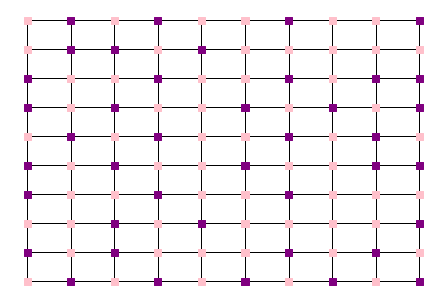

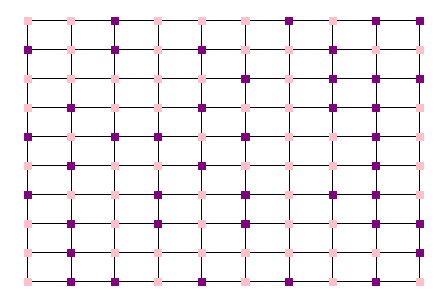

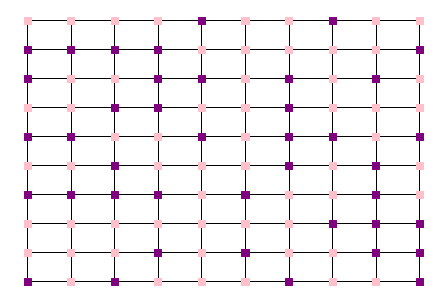

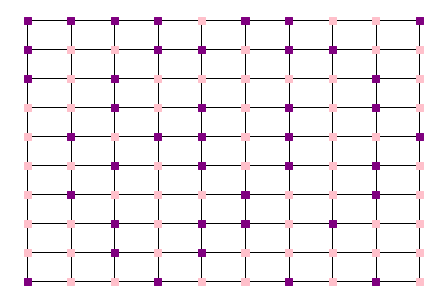

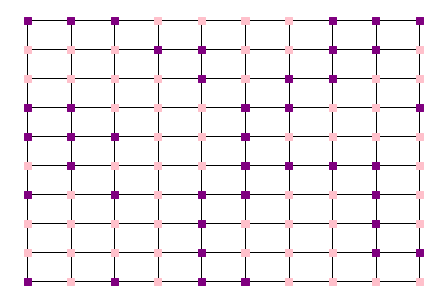

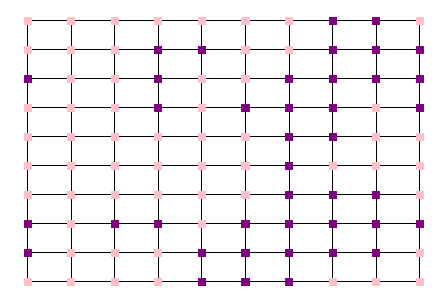

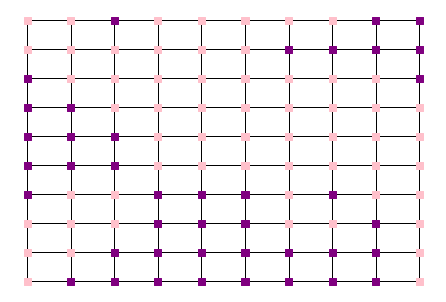

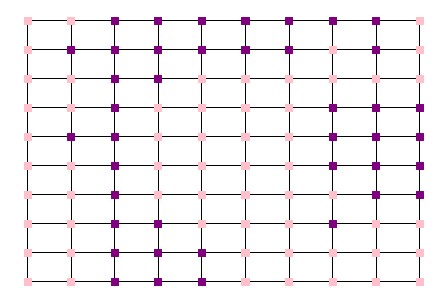

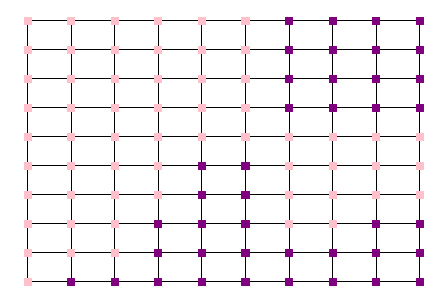

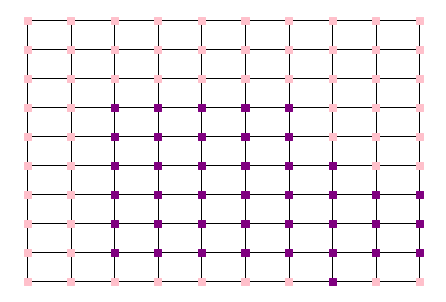

In [67]:
for i in dgl:
    plt.figure()
    nx.draw(
        i,
        pos={x: x for x in graph.nodes()},
        node_color=[cdict[i.node[x]["pink"]] for x in i.nodes()],
        node_size=ns,
        node_shape="s",
    )
plt.show()

    